In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Importing Deep Learning Libraries

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
import os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [24]:
INPUT_PATH_1 = "/kaggle/input/emotion-detection-fer/train/"
INPUT_PATH_2 = "/kaggle/input/fer2013/train/"
INPUT_PATH_TEST_1 = "/kaggle/input/emotion-detection-fer/test/"
INPUT_PATH_TEST_2 = "/kaggle/input/fer2013/test/"
OUTPUT_PATH = "/kaggle/input/merge/train/"
folder_path2 = "/kaggle/input/emotion-detection-fer"
folder_path3 = "/kaggle/input/fer2013"

In [9]:
total_images = 0
for dir_ in os.listdir(INPUT_PATH):
    count = 0
    for f in os.listdir(INPUT_PATH + dir_ + "/"):
        count += 1
        total_images += 1
    print(f"{dir_} has {count} number of images")
    
print(f"\ntotal images are {total_images}")

surprise has 3651 number of images
fear has 2590 number of images
neutral has 2257 number of images
sad has 2515 number of images
disgust has 2827 number of images
contempt has 2638 number of images
happy has 3427 number of images
anger has 3025 number of images

total images are 22930


In [32]:
import os
import shutil


# Create dictionaries to store images by class
dataset_1 = {}
dataset_2 = {}

# Merge 2 datasets by class 

for dir_ in os.listdir(INPUT_PATH_1):
    className = dir_
    if(className == "fearful"):
        className = "fear"
    elif(className == "disgusted"):
        className = "disgust"
    elif(className == "surprised"):
        className = "surprise"
    images = []
    
    for file in os.listdir(os.path.join(INPUT_PATH_1, dir_)):
        filePath = os.path.join(INPUT_PATH_1, dir_, file)
        images.append(filePath)
    
    dataset_1[className] = images

for dir_ in os.listdir(INPUT_PATH_2):
    className = dir_
    images = []
    
    for file in os.listdir(os.path.join(INPUT_PATH_2, dir_)):
        filePath = os.path.join(INPUT_PATH_2, dir_, file)
        images.append(filePath)
    
    dataset_2[className] = images

mergedDataset = {}

for className, images in dataset_1.items():
    if className in mergedDataset:
        mergedDataset[className].extend(images)
    else:
        mergedDataset[className] = images

for className, images in dataset_2.items():
    if className in mergedDataset:
        mergedDataset[className].extend(images)
    else:
        mergedDataset[className] = images

for className, images in mergedDataset.items():
    print(f"{className} has {len(images)} number of images")


fear has 4097 number of images
disgust has 436 number of images
angry has 3995 number of images
neutral has 4965 number of images
sad has 4830 number of images
surprise has 3171 number of images
happy has 7215 number of images


In [33]:
import os
import shutil


# Create dictionaries to store images by class
dataset_1 = {}
dataset_2 = {}

for dir_ in os.listdir(INPUT_PATH_TEST_1):
    className = dir_
    if(className == "fearful"):
        className = "fear"
    elif(className == "disgusted"):
        className = "disgust"
    elif(className == "surprised"):
        className = "surprise"
    images = []
    
    for file in os.listdir(os.path.join(INPUT_PATH_TEST_1, dir_)):
        filePath = os.path.join(INPUT_PATH_TEST_1, dir_, file)
        images.append(filePath)
    
    dataset_1[className] = images

for dir_ in os.listdir(INPUT_PATH_TEST_2):
    className = dir_
    images = []
    
    for file in os.listdir(os.path.join(INPUT_PATH_TEST_2, dir_)):
        filePath = os.path.join(INPUT_PATH_TEST_2, dir_, file)
        images.append(filePath)
    
    dataset_2[className] = images

mergedTestDataset = {}

for className, images in dataset_1.items():
    if className in mergedTestDataset:
        mergedTestDataset[className].extend(images)
    else:
        mergedTestDataset[className] = images

for className, images in dataset_2.items():
    if className in mergedTestDataset:
        mergedTestDataset[className].extend(images)
    else:
        mergedTestDataset[className] = images

for className, images in mergedTestDataset.items():
    print(f"{className} has {len(images)} number of images")


fear has 1024 number of images
disgust has 111 number of images
angry has 958 number of images
neutral has 1233 number of images
sad has 1247 number of images
surprise has 831 number of images
happy has 1774 number of images


In [35]:
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

X_train = []
y_train = []

for className, images in mergedDataset.items():
    for image_path in images:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        image = cv2.resize(image, (48, 48))  # Resize image to (48, 48)
        X_train.append(image)
        y_train.append(className)


X_train = np.array(X_train) / 255.0

label_encoder = LabelEncoder()
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train), num_classes=7)

In [36]:
import numpy as np
import cv2
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

X_test = []
y_test = []

for className, images in mergedTestDataset.items():
    for image_path in images:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        image = cv2.resize(image, (48, 48))  # Resize image to (48, 48)
        X_test.append(image)
        y_test.append(className)

X_test = np.array(X_test) / 255.0

label_encoder = LabelEncoder()
y_test_encoded = to_categorical(label_encoder.fit_transform(y_test), num_classes=7)

In [37]:
batch_size  = 128
picture_size = 48
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

In [38]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_18 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 128)      

In [39]:
from keras.optimizers import Adam,SGD,RMSprop


In [40]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [41]:
# Step 2: Compile and fit the model
opt = Adam(lr=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2, callbacks=[callbacks_list], validation_data = (X_test, y_test_encoded))

model.summary()

Epoch 1/10
898/898 [==============================] - 754s 837ms/step - loss: 1.9502 - accuracy: 0.2511 - val_loss: 1.6922 - val_accuracy: 0.3139 - lr: 1.0000e-04
Epoch 2/10
898/898 [==============================] - 749s 834ms/step - loss: 1.7373 - accuracy: 0.3348 - val_loss: 1.5870 - val_accuracy: 0.3975 - lr: 1.0000e-04
Epoch 3/10
898/898 [==============================] - 739s 823ms/step - loss: 1.6062 - accuracy: 0.3818 - val_loss: 1.4584 - val_accuracy: 0.4333 - lr: 1.0000e-04
Epoch 4/10
898/898 [==============================] - 744s 829ms/step - loss: 1.5114 - accuracy: 0.4165 - val_loss: 1.4173 - val_accuracy: 0.4480 - lr: 1.0000e-04
Epoch 5/10
898/898 [==============================] - 743s 828ms/step - loss: 1.4212 - accuracy: 0.4531 - val_loss: 1.3341 - val_accuracy: 0.4829 - lr: 1.0000e-04
Epoch 6/10
898/898 [==============================] - 748s 833ms/step - loss: 1.3567 - accuracy: 0.4829 - val_loss: 1.2379 - val_accuracy: 0.5231 - lr: 1.0000e-04
Epoch 7/10
898/898 [==

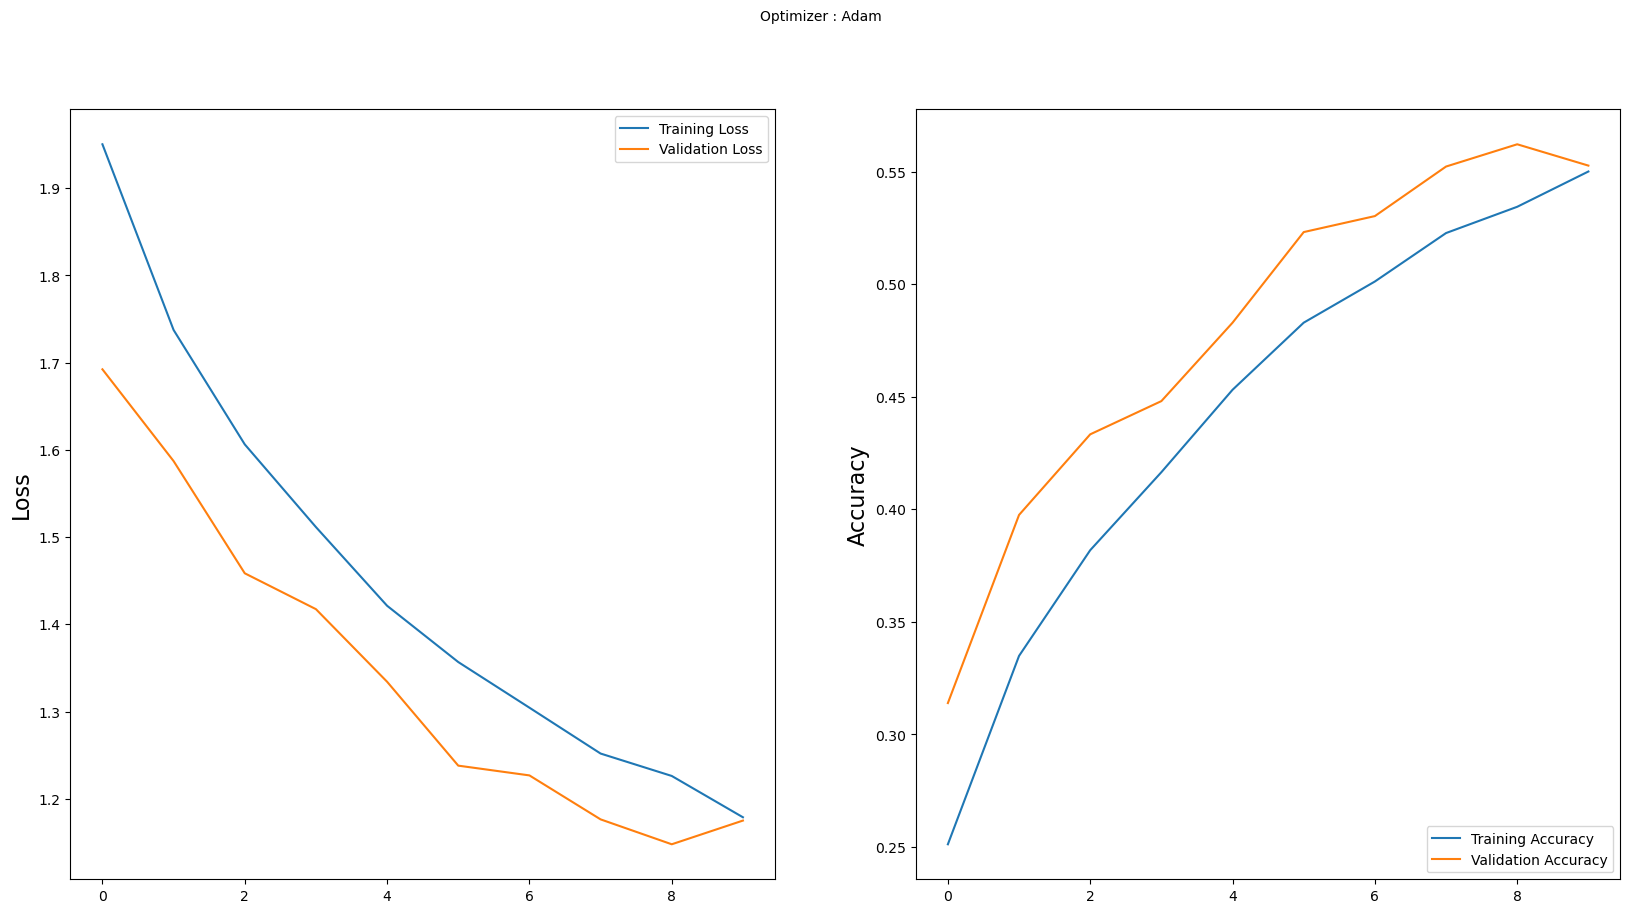

In [46]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model.history.history['accuracy'], label='Training Accuracy')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()